## 1. Install and import liberaries

In [1]:
# !pip install tensorflow

In [2]:
# !pip install gensim

In [3]:
# !pip install nltk

In [4]:
# !pip install pandas matplotlib seaborn sklearn

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import requests
import re

## 2. Load data from csv and API

In [4]:
df = pd.read_csv('dialect_dataset_pre-processed.csv')
df

## ML text classification

### Split into train and test

In [18]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
x_train, x_test, y_train, y_test = train_test_split(df["clean_text"], df["dialect"], test_size=0.2, shuffle=True, random_state=42, stratify=df["dialect"])

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [138]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/datascience/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/datascience/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/datascience/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### count vectorizer

## Support Vector Machines (SVM)

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train_cv = vectorizer.transform(x_train)
X_test_cv  = vectorizer.transform(x_test)
X_train_cv

<366557x460180 sparse matrix of type '<class 'numpy.int64'>'
	with 4536537 stored elements in Compressed Sparse Row format>

In [30]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cv)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_cv)
X_train_tfidf.shape

(366557, 460180)

In [31]:
clf_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42)
_ = clf_svm.fit(X_train_tfidf, y_train)

predicted_svm = clf_svm.predict(X_test_tfidf)
np.mean(predicted_svm == y_test)

0.5035901353120907

## Deep Learning model

In [13]:
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Conv1D, MaxPooling1D, Embedding, LSTM, SpatialDropout1D, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
MAX_NUM_WORDS = 1000
MAX_SEQUENCE_LENGTH = 285
NO_OF_CLASSES = len(set(df.dialect.values))
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)

X = tokenizer.texts_to_sequences(texts=df['clean_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
Y = pd.get_dummies(df['dialect']).values


### Split into train and test

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42, stratify=Y)
X_train.shape

(366557, 285)

In [28]:
n_latent_factors = 100
vocab_sz = MAX_NUM_WORDS
max_length = X.shape[1]
model2 = Sequential()
model2.add(Embedding(vocab_sz, n_latent_factors, input_length=max_length))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
# model2.add(Dense(NO_OF_CLASSES, activation='sigmoid'))
model2.add(Dense(NO_OF_CLASSES, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 285, 100)          100000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 28500)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               3648128   
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 18)                1170      
Total params: 3,757,554
Trainable params: 3,757,554
Non-trainable params: 0
_________________________________________________________________


In [29]:
model2.compile(optimizer=RMSprop(lr=0.001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[binary_accuracy])

history2 = model2.fit(X_train,
                    Y_train,
                    epochs=20,
                    batch_size=256,
                    validation_split=0.2)
history_dict2 = history2.history
history_dict2.keys()

Epoch 1/20
1146/1146 [==============================] - 31s 26ms/step - loss: 0.2103 - binary_accuracy: 0.9444 - val_loss: 0.2085 - val_binary_accuracy: 0.9444
Epoch 2/20
1146/1146 [==============================] - 30s 26ms/step - loss: 0.2082 - binary_accuracy: 0.9445 - val_loss: 0.2082 - val_binary_accuracy: 0.9444
Epoch 3/20
1146/1146 [==============================] - 30s 27ms/step - loss: 0.2080 - binary_accuracy: 0.9445 - val_loss: 0.2078 - val_binary_accuracy: 0.9444
Epoch 4/20
1146/1146 [==============================] - 30s 26ms/step - loss: 0.2079 - binary_accuracy: 0.9445 - val_loss: 0.2078 - val_binary_accuracy: 0.9444
Epoch 5/20
1146/1146 [==============================] - 30s 26ms/step - loss: 0.2078 - binary_accuracy: 0.9445 - val_loss: 0.2077 - val_binary_accuracy: 0.9444
Epoch 6/20
1146/1146 [==============================] - 30s 26ms/step - loss: 0.2077 - binary_accuracy: 0.9445 - val_loss: 0.2080 - val_binary_accuracy: 0.9444
Epoch 7/20
1146/1146 [==================

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

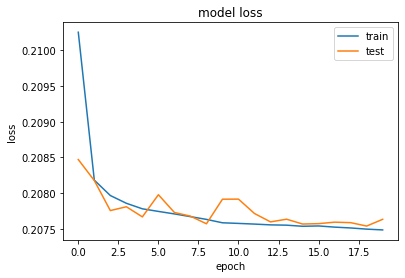

In [30]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

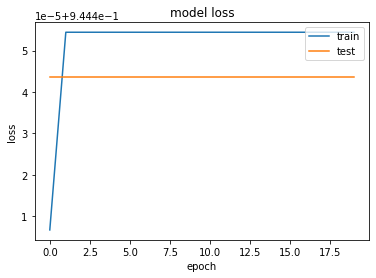

In [31]:
plt.plot(history2.history['binary_accuracy'])
plt.plot(history2.history['val_binary_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [32]:
# Final evaluation of the model
scores = model2.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 94.44%


In [33]:
model2.save('DL_model.h5')

In [34]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)